In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(fname):
    im     = Image.open(fname)
    width, height = im.size
    mode   = im.mode
    pixels = list(im.getdata())
    im.close()

    r_pxs  = map(lambda x:x[0], pixels)
    g_pxs  = map(lambda x:x[1], pixels)
    b_pxs  = map(lambda x:x[2], pixels)
    r_pxs  = [r_pxs[i * width:(i + 1) * width] for i in xrange(height)]
    g_pxs  = [g_pxs[i * width:(i + 1) * width] for i in xrange(height)]
    b_pxs  = [b_pxs[i * width:(i + 1) * width] for i in xrange(height)]

    return mode, (width, height), (r_pxs, g_pxs, b_pxs)

In [3]:
# 取前k个SVD奇异值重建图像
def do_svd_compress(matrix, depth = 1):
    matrix_    = np.asarray(matrix, dtype = float)
    U, Sd, Vt  = np.linalg.svd(matrix_, full_matrices = True)
    S          = np.zeros(matrix_.shape, dtype = float)
    S[:depth, :depth] = np.diag(Sd[:depth])
    return np.dot(U, np.dot(S, Vt)), len(Sd)

In [4]:
def svd_compress(mode, size, rgb, depth):
    r, rs_num = do_svd_compress(rgb[0], depth)
    g, gs_num = do_svd_compress(rgb[1], depth)
    b, bs_num = do_svd_compress(rgb[2], depth)

    int_it = lambda f:int(round(f, 0))

    pixels = map(lambda x, y, z: (int_it(x), int_it(y), int_it(z)),
                                            r.flat, g.flat, b.flat)
    pixels = np.array(pixels, dtype=np.uint8)
    return rs_num, gs_num, bs_num, pixels

In [5]:
mode, size, rgb = read_image('../data/svd/cat.jpg')

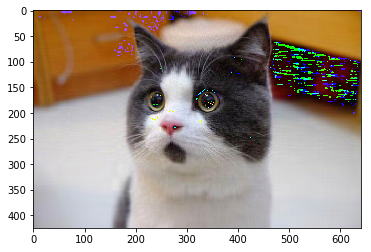

In [6]:
rs_num, gs_num, bs_num, pixels = svd_compress(mode, size, rgb, 50)
pixels = pixels.reshape((size[1], size[0], 3))
plt.imshow(pixels)